4422102/4422102 [==============================] - 0s 0us/step


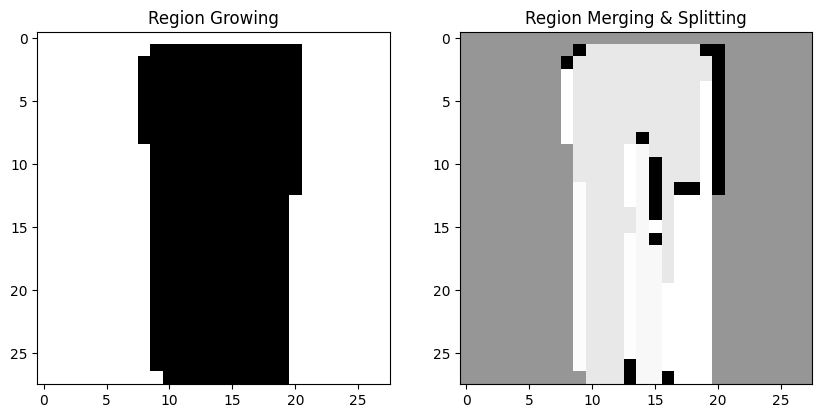

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(train_images, _), (_, _) = fashion_mnist.load_data()
image_index = np.random.randint(0, len(train_images))
image = train_images[image_index]

def region_growing(image, seed, threshold):
    output_image = np.zeros_like(image)
    output_image[seed] = 255
    neighbors = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    while True:
        pixels_added = 0
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                if output_image[y, x] == 255:
                    for dx, dy in neighbors:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0]:
                            if output_image[ny, nx] == 0 and abs(int(image[ny, nx]) - int(image[y, x])) <= threshold:
                                output_image[ny, nx] = 255
                                pixels_added += 1
        if pixels_added == 0:
            break
    return output_image

def region_merging_splitting(image, threshold):
    output_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if output_image[y, x] == 0:
                seed = (x, y)
                region = region_growing(image, seed, threshold)
                output_image += region
    return output_image

start_position = (5, 5)
threshold = 20
region_grown_image = region_growing(image, start_position, threshold)
region_merged_split_image = region_merging_splitting(image, threshold)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(region_grown_image, cmap='gray')
plt.title('Region Growing')
plt.subplot(1, 2, 2)
plt.imshow(region_merged_split_image, cmap='gray')
plt.title('Region Merging & Splitting')
plt.show()
